# Plotting Tutorial

This notebook provides an example of reading and manipulating tables using the `astropy` package as well as accessing specific columns in a table for plotting purposes. Example plots are shown at the end of the notebook.

# Reading in Data & Displaying in Notebook

In [1]:
from astropy.table import Table
from astropy.table import join
import matplotlib.pyplot as plt

pisco_data = Table.read('pisco_data.txt', format='ascii')
sn_data = Table.read('sn1a_list.csv')

In [2]:
pisco_data.show_in_notebook(display_length=10)

idx,SNNAME,TYPE,Ha,eHa,Hb,eHb,OIIIb,eOIIIb,NIIb,eNIIb,SII,eSII,OI,eOI,HeI,eHeI,SFR,OH,HaEW,eHaEW,LumFlux,Areakpc,av,avs,agel,eagel,agem,eagem,zl,ezl,zm,ezm
0,1969C,Ia,2.554e-15,4.524e-16,8.93e-16,1.509e-16,3.194e-16,5.559e-17,1.228e-15,2.112e-16,8.436e-16,1.123e-16,3.358e-16,8.305e-17,9.721e-17,3.18e-17,0.0047688,8.853,10.67,0.5,1.867e+12,1.0,0.0,0.3284,8.9200315,1.012646,9.672761,0.480098,0.01625,0.011699,0.018033,0.013178
1,2007ax,Ia,nan,nan,6.451e-16,1.838e-16,1.016e-15,1.208e-16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.12,0.08,816200000000.0,1.0,nan,0.0,9.6626015,0.714009,9.8093042,0.235864,0.025656,0.012868,0.024966,0.013468
2,2009gf,Ia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2007hj,Ia,1.931e-16,1.814e-17,2.723e-16,2.558e-17,nan,nan,6.026e-17,5.661e-18,nan,nan,4.531e-17,4.256e-18,1.495e-16,1.405e-17,0.0083282,nan,0.74,0.12,3.501e+12,0.4869081,0.0,0.0,9.4810486,0.50856,9.7460508,0.238046,0.029563,0.005056,0.028747,0.00593
4,2005cc,man,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,2006bb,Ia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,1999ej,Ia,3.625e-17,4.588e-18,nan,nan,4.843e-17,4.55e-18,nan,nan,nan,nan,nan,nan,nan,nan,0.0001198,nan,nan,nan,3.307e+12,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,2007hu,Ia,1.693e-17,2.057e-18,nan,nan,2.197e-17,2.064e-18,2.225e-17,3.621e-18,nan,nan,nan,nan,2.776e-18,7.359e-19,0.0003931,nan,1.99,0.53,2.322e+13,1.0,nan,0.2975,9.578763,0.964535,10.0051918,0.217108,0.029078,0.006924,0.031509,0.000747
8,2002jg,Ia,7.26e-16,9.771e-17,2.654e-16,3.679e-17,1.255e-16,1.792e-17,3.32e-16,4.451e-17,3.827e-16,3.846e-17,1.01e-16,1.212e-17,8.612e-17,8.091e-18,0.0028723,8.619,9.88,0.53,3.956e+12,1.0,1.4456598,0.6748,8.1536188,0.462437,8.9632139,0.88689,0.027611,0.007439,0.030333,0.004818
9,2007R,Ia,2.633e-16,5.455e-17,9.206e-17,1.65e-17,1.578e-16,1.633e-17,1.778e-16,4.186e-17,nan,nan,nan,nan,nan,nan,0.0123207,nan,nan,nan,1.733e+13,1.4815869,1.689438,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [3]:
sn_data.show_in_notebook(display_length=10)

idx,sn,amusing_name,ra,dec,z,ST,STerr,COL,COLerr,Bmag,Bmagerr
0,SN2012fr,NGC1365,03:33:35.99,-36:07:37.7,0.0054,1.077,0.004,0.01,0.014,12.007,0.011
1,SN2006mr,NGC1316_1,03:22:42.84,-37:12:28.5,0.005508,0.5,0.004,0.695,0.016,15.327,0.018
2,SN2006dd,NGC1316_1,03:22:41.64,-37:12:13.2,0.005871,0.972,0.009,-0.049,0.014,12.242,0.016
3,SN2001A,NGC4261,12:19:23.01,+05:49:40.5,0.007469,nan,nan,nan,nan,nan,nan
4,SN2009Y,NGC5728_1,14:42:23.68,-17:14:48.4,0.009316,1.018,0.014,0.167,0.015,13.981,0.044
5,SN1999ee,IC5179,22:16:09.40,-36:50:31.5,0.01141,1.063,0.004,0.252,0.002,14.847,0.009
6,SN2017dps,IC4296,13:36:40.04,-33:58:01.29,0.012465,nan,nan,nan,nan,nan,nan
7,SN2008ee,NGC0307,00:56:32.96,-01:46:16.0,0.0134,nan,nan,nan,nan,nan,nan
8,SN2017cze,2MIG_1546,11:09:46.82,-13:22:50.66,0.01486,nan,nan,nan,nan,nan,nan
9,SN2000ey,IC1481,23:19:25.09,+05:54:21.9,0.02041,nan,nan,nan,nan,nan,nan


# Joining Tables

When joining tables, it is smart to make a copy of the originally saved table data. This is important because
if an error is made when manipulating the data, a backup copy still exists that was not overwritten and reading in the data again is not necessary.

In this example, when using SN names as keys to join tables, naming conventions between tables need to be changed to match. Be careful when changing SN naming conventions - modifications for one convention may not work for other conventions. In this case, it was sufficient to simply add 'SN' to the beginning of the names in the pisco data. 

When finally joining the tables, the two columns by which python joins the tables must be temporarily renamed to match. It is then possible to join the tables by a single column title - in this example, 'key'.

In [4]:
# Make table copies
pisco_data_copy = pisco_data.copy()
sn_data_copy = sn_data.copy()

# Match naming conventions
for row in pisco_data_copy:
    if len(row['SNNAME']) < 8:
        row['SNNAME'] = 'SN' + row['SNNAME']

# Rename columns to match
pisco_data_copy.rename_column('SNNAME', 'key')
sn_data_copy.rename_column('sn', 'key')

combined_table = join(sn_data_copy, pisco_data_copy, keys='key')
combined_table.show_in_notebook(display_length=10)

idx,key,amusing_name,ra,dec,z,ST,STerr,COL,COLerr,Bmag,Bmagerr,TYPE,Ha,eHa,Hb,eHb,OIIIb,eOIIIb,NIIb,eNIIb,SII,eSII,OI,eOI,HeI,eHeI,SFR,OH,HaEW,eHaEW,LumFlux,Areakpc,av,avs,agel,eagel,agem,eagem,zl,ezl,zm,ezm
0,LSQ12hzj,LSQ12hzj,09:59:12.43,-09:00:08.3,0.033532,0.966,0.01,-0.092,0.008,16.487,0.024,Ia,7.869e-18,2.032e-18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0001617,nan,0.47,0.18,2.054e+13,3.9014719,nan,0.6152,8.4176922,1.417915,9.9918699,0.30468,0.015242,0.009233,0.018145,0.007306
1,SN1963J,NaN,11:50:38.29,+55:21:01.2,0.00318,1.523,0.292,-0.721,0.129,11.741,0.282,Ia,1.62e-14,2.387e-15,5.664e-15,8.815e-16,1.98e-15,2.987e-16,5.941e-15,8.582e-16,6.441e-15,7.188e-16,1.096e-15,1.03e-16,nan,nan,0.002803,8.62,16.46,0.54,173000000000.0,1.0,0.0,0.1448,8.8244801,1.115697,9.4722309,0.524286,0.010298,0.008252,0.009648,0.004929
2,SN1969C,NaN,11:41:17.8,+47:41:33.0,0.01057,0.487,0.101,-0.435,0.12,12.471,0.357,Ia,2.554e-15,4.524e-16,8.93e-16,1.509e-16,3.194e-16,5.559e-17,1.228e-15,2.112e-16,8.436e-16,1.123e-16,3.358e-16,8.305e-17,9.721e-17,3.18e-17,0.0047688,8.853,10.67,0.5,1.867e+12,1.0,0.0,0.3284,8.9200315,1.012646,9.672761,0.480098,0.01625,0.011699,0.018033,0.013178
3,SN1970J,NaN,23:20:12.0,+08:11:56.0,0.0132,0.935,0.008,-0.405,0.014,14.009,0.034,Ia,0.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,nan,0.0,0.0,2.757e+12,0.5796101,nan,0.2567,10.0716248,0.035356,10.0697947,0.035356,0.005891,0.002729,0.006032,0.002729
4,SN1989A,NaN,11:27:59.02,+29:30:21.4,0.008359,0.93,0.027,0.05,0.022,13.903,0.014,Ia,8.424e-16,1.189e-16,2.945e-16,4.744e-17,2.171e-16,2.648e-17,2.654e-16,4.209e-17,4.184e-16,3.767e-17,8.094e-17,1.134e-17,nan,nan,0.0010201,8.44,12.51,0.79,1.211e+12,1.0,2.1216471,0.1342,8.9395008,0.64963,9.7272367,0.481275,0.024102,0.011108,0.029122,0.007193
5,SN1995E,NaN,07:51:56.75,+73:00:34.6,0.01158,0.958,0.019,0.741,0.019,16.709,0.021,Ia,3.084e-15,6.248e-16,1.078e-15,2.265e-16,3.439e-16,4.106e-17,1.451e-15,2.89e-16,1.545e-15,1.932e-16,nan,nan,nan,nan,0.0072162,8.656,13.17,0.7,2.34e+12,1.0,0.47944,0.3153,8.7608204,1.162481,9.4425945,0.538512,0.028927,0.00909,0.03151,0.000853
6,SN1995bd,NaN,04:45:21.24,+11:04:02.5,0.0152,1.028,0.011,0.279,0.029,15.261,0.203,Ia-91T,3.396e-15,5.009e-16,1.187e-15,2.067e-16,7.044e-16,6.81e-17,1.86e-15,2.811e-16,1.501e-15,1.333e-16,nan,nan,nan,nan,0.0127386,8.796,10.84,0.7,3.751e+12,1.0,1.239532,0.4909,8.8637037,1.3114361,9.7436924,0.298682,0.007806,0.007224,0.006644,0.004627
7,SN1997cw,NaN,00:25:17.27,+12:53:06.2,0.01765,1.105,0.031,0.356,0.024,15.939,0.057,Ia-91T,9.762e-16,2.21e-16,3.413e-16,7.348e-17,2.207e-16,5.177e-17,3.796e-16,8.593e-17,4.018e-16,6.068e-17,2.731e-17,6.949e-18,3.081e-17,8.766e-18,0.0053906,8.637,58.17,2.15,5.522e+12,1.0,1.1305516,0.0737,9.065856,0.862529,10.0150633,0.502438,0.010038,0.010163,0.01109,0.014751
8,SN1998aq,NaN,11:56:25.87,+55:07:43.2,0.003699,0.986,0.005,-0.124,0.008,12.322,0.009,Ia,9.285e-16,1.102e-16,3.247e-16,5.531e-17,5.213e-16,8.304e-17,7.415e-16,7.976e-17,7.482e-16,6.005e-17,5.369e-16,5.043e-17,4.18e-16,5.655e-17,0.0002174,8.741,5.94,0.89,234100000000.0,1.0,2.7030008,0.0964,8.336257,1.567981,10.0115023,0.408181,0.014573,0.011784,0.022995,0.0127
9,SN1999aa,NaN,08:27:42.03,+21:29:14.8,0.01444,1.113,0.006,-0.055,0.008,14.727,0.018,Ia-91T,8.725e-16,1.134e-16,3.051e-16,4.972e-17,1.905e-16,3.278e-17,3.957e-16,6.107e-17,4.705e-16,4.6e-17,nan,nan,2.201e-17,8.272e-18,0.0032015,8.604,14.25,0.83,3.669e+12,1.0,nan,0.0,8.809844,0.94234,9.6377163,0.547524,0.025264,0.009642,0.024121,0.007927


# Keeping Specific Columns

When a table has many columns and you only want certain columns to remain, it is easiest to use `.keep_columns` 
and specifically choose the titles of the columns you wish to keep.

In [5]:
combined_table.keep_columns(['key', 'z', 'ST', 'COL', 'Bmag', 'SFR', 'OH', 'HaEW'])
combined_table.show_in_notebook(display_length=10)

idx,key,z,ST,COL,Bmag,SFR,OH,HaEW
0,LSQ12hzj,0.033532,0.966,-0.092,16.487,0.0001617,nan,0.47
1,SN1963J,0.00318,1.523,-0.721,11.741,0.002803,8.62,16.46
2,SN1969C,0.01057,0.487,-0.435,12.471,0.0047688,8.853,10.67
3,SN1970J,0.0132,0.935,-0.405,14.009,0.0,nan,0.0
4,SN1989A,0.008359,0.93,0.05,13.903,0.0010201,8.44,12.51
5,SN1995E,0.01158,0.958,0.741,16.709,0.0072162,8.656,13.17
6,SN1995bd,0.0152,1.028,0.279,15.261,0.0127386,8.796,10.84
7,SN1997cw,0.01765,1.105,0.356,15.939,0.0053906,8.637,58.17
8,SN1998aq,0.003699,0.986,-0.124,12.322,0.0002174,8.741,5.94
9,SN1999aa,0.01444,1.113,-0.055,14.727,0.0032015,8.604,14.25


# Plotting

Before plotting, the names of the parameters have been assigned from specific columns in the joined table above. 
It is not necessary to do this before making the plots, however, this was just to demonstrate which column
corresponded to which parameter. 

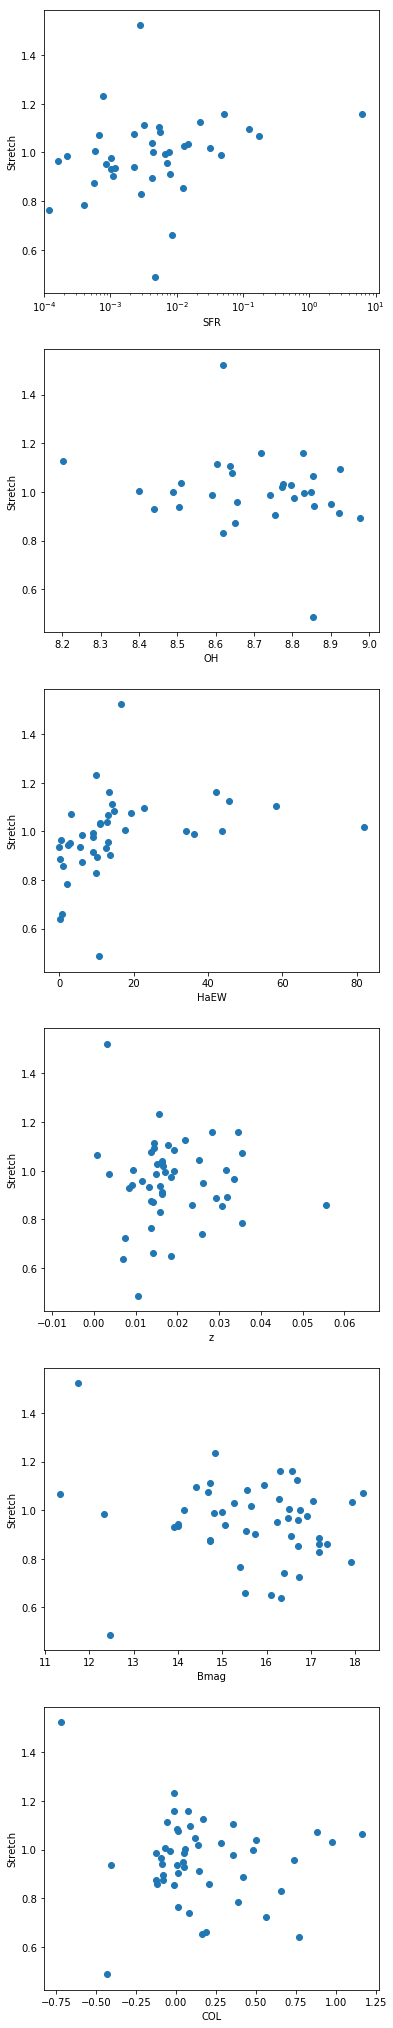

In [7]:
stretch = combined_table['ST']
color = combined_table['COL']
app_mag = combined_table['Bmag']
z = combined_table['z']
sfr = combined_table['SFR']
oh = combined_table['OH']
haew = combined_table['HaEW']

f = plt.figure()
plt.subplots_adjust(top = 7)

ax1 = plt.subplot(6, 1, 1)
ax1.scatter(sfr, stretch)
ax1.set_xscale('log')
ax1.set_xlim(0.0001)
ax1.set_xlabel('SFR')
ax1.set_ylabel('Stretch')

ax2 = plt.subplot(6, 1, 2)
ax2.scatter(oh, stretch)
ax2.set_xlabel('OH')
ax2.set_ylabel('Stretch')

ax3 = plt.subplot(6, 1, 3)
ax3.scatter(haew, stretch)
ax3.set_xlabel('HaEW')
ax3.set_ylabel('Stretch')

ax4 = plt.subplot(6, 1, 4)
ax4.scatter(z, stretch)
ax4.set_xlabel('z')
ax4.set_ylabel('Stretch')

ax5 = plt.subplot(6, 1, 5)
ax5.scatter(app_mag, stretch)
ax5.set_xlabel('Bmag')
ax5.set_ylabel('Stretch')

ax6 = plt.subplot(6, 1, 6)
ax6.scatter(color, stretch)
ax6.set_xlabel('COL')
ax6.set_ylabel('Stretch')

plt.show()